<a href="https://colab.research.google.com/github/sohyun329/Python-ML-study/blob/main/05_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 회귀
- 현대 통계학을 떠받치고 있는 주요 기둥 중 하나
- 회귀 기반의 분석은 엔지니어링, 의학, 사회과학, 경제학 등의 분야가 발전하는데 크게 기여
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정 값
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것
- 회귀는 회귀 계수의 선형 / 비선형 여부, 독립변수의 개수(단일, 다중), 종속변수의 개수에 따라 여러가지 유형으로 나눌 수 있음
- 회귀에서 가장 중요한 것은 **회귀 계수**
- 지도학습은 분류와 회귀로 나뉜다.
- 분류 : 예측값이 카테고리와 같은 이산형 클래스 값
- 회귀 : 연속형 숫자 값
- 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
  - 선형 회귀 모델 : 규제(Regularization)방법에 따라 다시 별도의 유형으로 나뉨
    - 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용
    - 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    - 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
      - L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
    - 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식
      - L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
      - L1 규제는 피처 선택 기능이라고 불림
    - 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델
      - 주로 피처가 많은 데이터 세트에서 적용되며, L1규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정
    - 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델
      - 매우 강력한 분류 알고리즘
      - 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들면 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임


# 02. 단순 선형 회귀를 통한 회귀 이해
- 단순 선형 회귀는 독립변수 하나, 종속변수 하나인 선형 회귀
  - Y = w0 + w1*X + 오류값
  - 기울기 w1과 절편 w0을 회귀 계수로 지칭
  - 오류 값(잔차) : 실제 값과 회귀 모델의 차이
  - 최적의 회귀 모델을 만든다는 것 : 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미
    - 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미
  - 오류 값은 + / -  :
    - 오류 합을 계산할 때는 절댓값을 취해 더하거나 (Mean Absolute Error)
    - 오류 값의 제곱을 구해서 더하는 방식 (RSS, Residual Sum of Square)을 취한다.
    - 미분 등의 계산을 편리하기 위해 RSS 방식으로 오류합을 구한다. Error^2 = RSS
  - RSS 변수가 w0, w1인 식으로 표현할 수 있음
    - RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항
    - w 변수(회귀계수)가 중심 변수임을 인지하는 것이 중요
    - 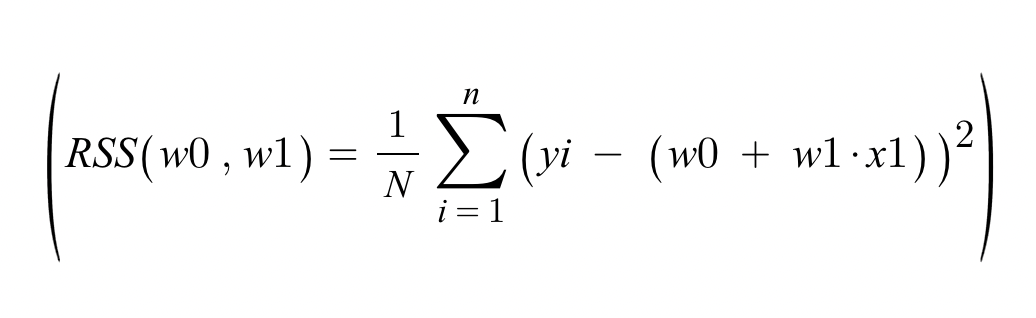
    - RSS는 Cost(비용)이며 w변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다
    - 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것
    - 비용함수를 손실함수라고도 한다.

# 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
- 경사하강법 : 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식
  - '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나
  - '점진적으로' 반복적인 계산을 통해 w파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w파라미터를 구하는 방식
  - 반복적으로 비용 함수의 반환 값, 즉 예측 값과 실제 값의 차이가 작아지는 방향성을 가지고 w파라미터를 지속해서 보정해 나간다.
  - 오류값이 더이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 반환
  - "어떻게 하면 오류가 작아지는 방향으로 w값을 보정할 수 있을까?"  
  - <img src="https://velog.velcdn.com/images%2Fgjtang%2Fpost%2F500d7fc8-1753-40d6-9b08-c42762db218e%2Fimage.png">
  - w1, w0의 편미분 결과값을 반복적으로 보정하면서 w1, w0값을 업데이트하면 비용 함수 R(w)가 최소가 되는 w1, w0 값을 구할 수 있다.
  - <img src="https://velog.velcdn.com/images%2Fgjtang%2Fpost%2F22627e85-330b-481b-abd2-8534e366308c%2Fimage.png">
  - 실제로는 편미분 값이 너무 클 수 있기 때문에 보정계수 η(학습률)를 곱합

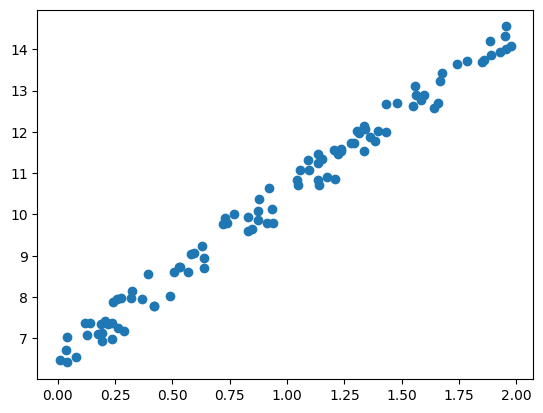

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
# get_cost()는 실제 y값과 예측된 y값을 인자로 받아서 RSS 계산
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
# 경사하강법 gradient_descent()함수 생성
# w1과 w0을 모두 0으로 초기화한 뒤 iters개수만큼 반복하면서 w1과 w0을 업데이트

# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T)+w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
  # w0과 w1를 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost : 0.0775


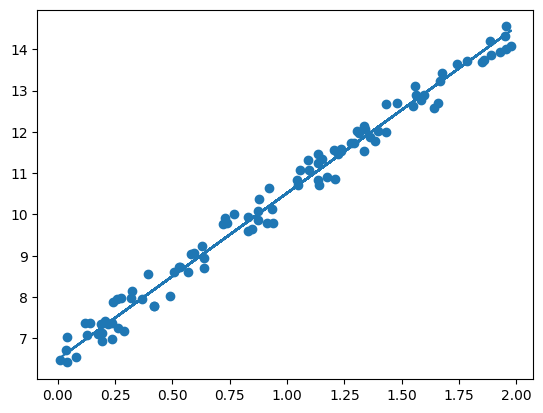

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.
- 실전에서는 대부분 확률적 경사 하강법을 이용
- 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다.
- 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출

In [ ]:
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.0777


# 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
## LinearRegression 클래스 - Ordinary Least Squares
- LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- Ordinary Least Square 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다
- 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감
  - 이러한 현상을 다중 공선성(multi-collinearity)문제라고 한다.
- 일반적으로 상관관게가 매우 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
- 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해볼 수 있다.  

## 회귀 평가 지표
- 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심
- 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여 오류가 상쇄된다.
- MAE : 실제값과 예측값의 차이를 절댓값으로 변환해 평균
- MSE : 실제값과 예측값의 차이를 제곱해 평균
- RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌움
- R^2 : 분산 기반으로 예측 성능을 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며 1에 가까울수록 예측 정확도가 높다.  

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [ ]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


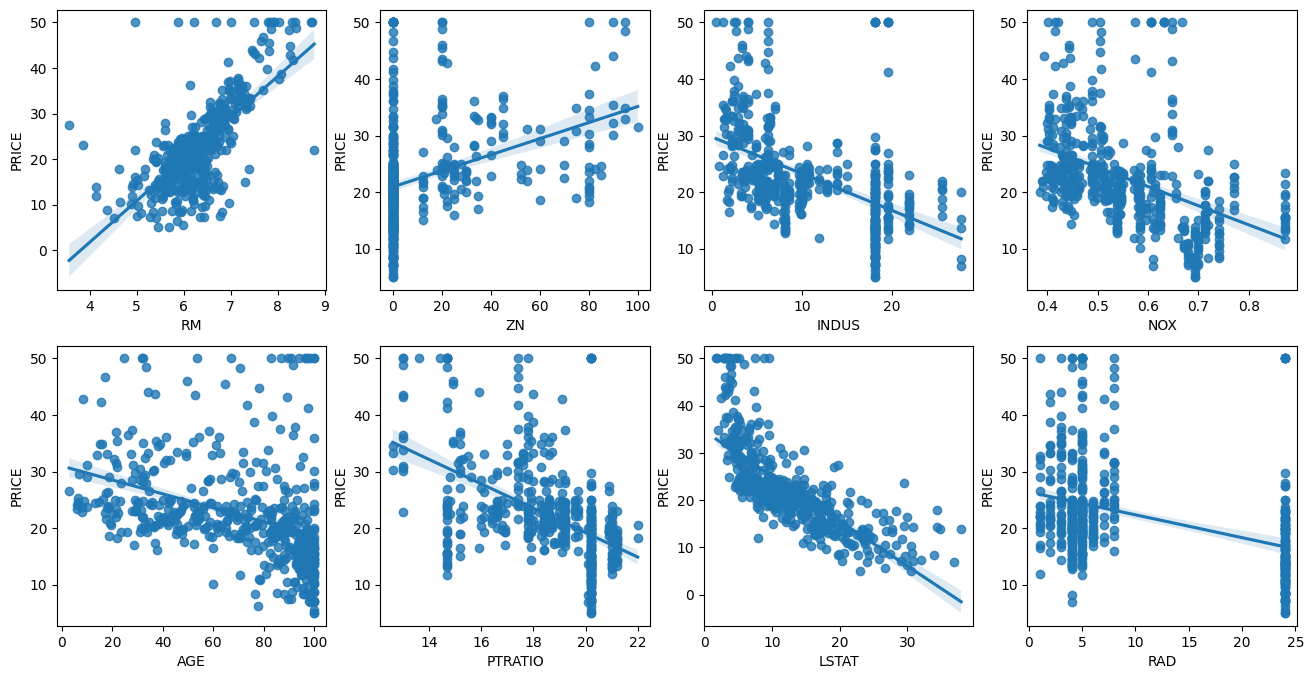

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])


- RM과 LSTAT의 PRICE 영향도가 가장 두드러짐
- RM(방 개수)은 양 방향의 선형성이 가장 크다
  - 방의 크기가 클수록 가격이 증가하는 모습을 보여줌
- LSTAT(하위 계층의 비율)는 음 방향의 선형성이 가장 크다
  - LSTAT이 적을수록 PRICE가 증가하는 모습을 보여줌

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297, RMSE:4.159
Variance score:0.757


In [ ]:
print('절편 값: ',lr.intercept_)
print('회귀 계수값 :',np.round(lr.coef_,1))

절편 값:  40.995595172164485
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM이 양읭 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보인다.

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


# 05. 다항 회귀와 과(대)적합/과소적합 이해
## 다항 회귀 이해
- 세상의 모든 관계를 직선으로만 표현할 수는 없다.
- 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 **다항회귀**라고 한다.
- 다항회귀는 "선형회귀"로 분류
- 선형 회귀 / 비선형 회귀를 나누는 기준은 **회귀 계수가 선형 / 비선형**인지에 따른것
- 독립변수의 선형/비선형 여부와는 무관
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음
- 하지만 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.
- PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환ㄴ
- PolynomialFeatures 클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.

In [ ]:
# [x1,x2] -> [1, x1, x2, x1^2, x1x2, x2^2]로 변환하는 예제

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolymialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도

In [ ]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값" \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값" 
 [  5 125]


In [ ]:
# [x1,x2] -> [1, x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x2^3] 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


- Polynomial 회귀 계수 : [ 0. 0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34 ]
- 원래 다항식의 계수 값 :  [ 1, 2, 0, 3, 0, 0, 0, 0, 0,4 ]
- 근사하고 있다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,0]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.07 0.07 0.14 0.22 0.29 0.29 0.43 0.65 0.94]


## 다항 회귀를 이용한 과소적합 및 과적합 이해
= 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다.
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능
- 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다.
- 차수가 높아질수록 과적합의 문제 크게 발생

- 원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관게를 가지도록 만들어 줌
- 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


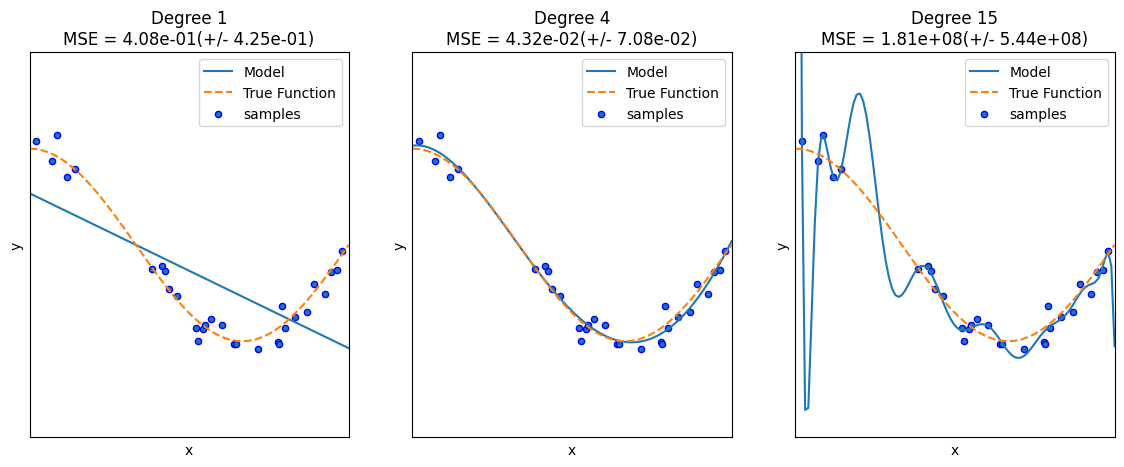

In [ ]:
# 학습 데이터 30개의 임의의 데이터 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1

plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features",polynomial_features), ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)

  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label="True Function")
  plt.scatter(X, y, edgecolor='b', s=20, label="samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선 : 다항 회귀 예측 곡선
- 점선 : 실제 데이터 세트 X,Y의 코사인 곡선
- degree1 : 과소적합 / 한 방향성으로 치우친 경향 (고편향)
- degree4 : 실제 데이터 세트와 유사한 모습
- degree15 : 과대적합 / 하나의 특성을 반영하면서 지나치게 높은 변동을 가짐 (고분산)

## 편향-분산 트레이드오프(Bias-Variance Trade off)
- 편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중 하나

 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" >
- 저편향/저분산(Low Bias / Low Variance) : 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능을 보여줌
- 저편향/고분산(Low Bias / High Variance) : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 괘 넓은 부분에 분포돼 있다.
- 고편향/저분산(High Bias / Low Variance) : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중
- 고편향/고분산(High Bias / High Variance) : 정확한 예측 겨과를 벗어나면서 넓은 부분에 분포


 <img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjJfMjMg/MDAxNTYzNzk3Nzc0NDcw.VdLhR996Ys1uG0V5R_9UD6Wg4jZL3dI_3Phnu13mdY4g.OkHU-OcxcVk4R4KU7bI_xHCUEKh8Gfs_stvNrmBH02Ig.PNG.ckdgus1433/image.png?type=w800" >

- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다.
- 편향 높아지면 분산 낮아짐(과소적합), 분산 높으면 편향 낮아짐(과적합)
- 편향이 너무 높으면 전체 오류 높다
- 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아짐
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스'지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하
- 높은 평향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합 되기 쉽다

# 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
## 규제 선형 모델의 개요
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
- 선형 모델의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려함
- 이러다 보면 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커짐
- 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 쉽게 저하  


- 비용 함수 목표 = Min(RSS(W) + alpha*||W||)
- alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
- alpha가 0(또는 매우 작은값)이라면 비용 함수 식은 기존과 동일한 Min(RSS(W)+0)
- alpha가 무한대(또는 매우 큰값)이라면 비용 함수 식은 너무 커지게 되므로 W값을 0(또는 매우 작게)으로 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다.
- 따라서 alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.
- 규제(Regularization) : 비용 함수에 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- 규제는 L2, L1방식으로 구분
- L2규제는 W의 제곱에 대해 페널티를 부여하는 방식 : L2규제를 적용한 회귀 = 릿지(Ridge)
- L1규제는 W의 절댓값에 대해 페널티를 부여 : L1규제를 적용한 회귀 = 라쏘(Lasso)

## 릿지 회귀
- Ridge 클래스
- Ridge 클래스의 주요 생성 파라미터 = alpha, 릿지 회귀의 alpha L2 규제 계수에 해당

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print(' 5 folds의 개별 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 개별 평균 RMSE scores: 5.518


In [ ]:
# alpha값 0. 0.1 1. 10. 100.으로 변화시키면서 RMSE와 회귀 계수값 변화 추이

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  # cross_val_score를 이용해 5폴드의 평균 RMSE 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds의 평균 RMSE : 5.788
alpha 1일 때 5 folds의 평균 RMSE : 5.653
alpha 10일 때 5 folds의 평균 RMSE : 5.518
alpha 100일 때 5 folds의 평균 RMSE : 5.330


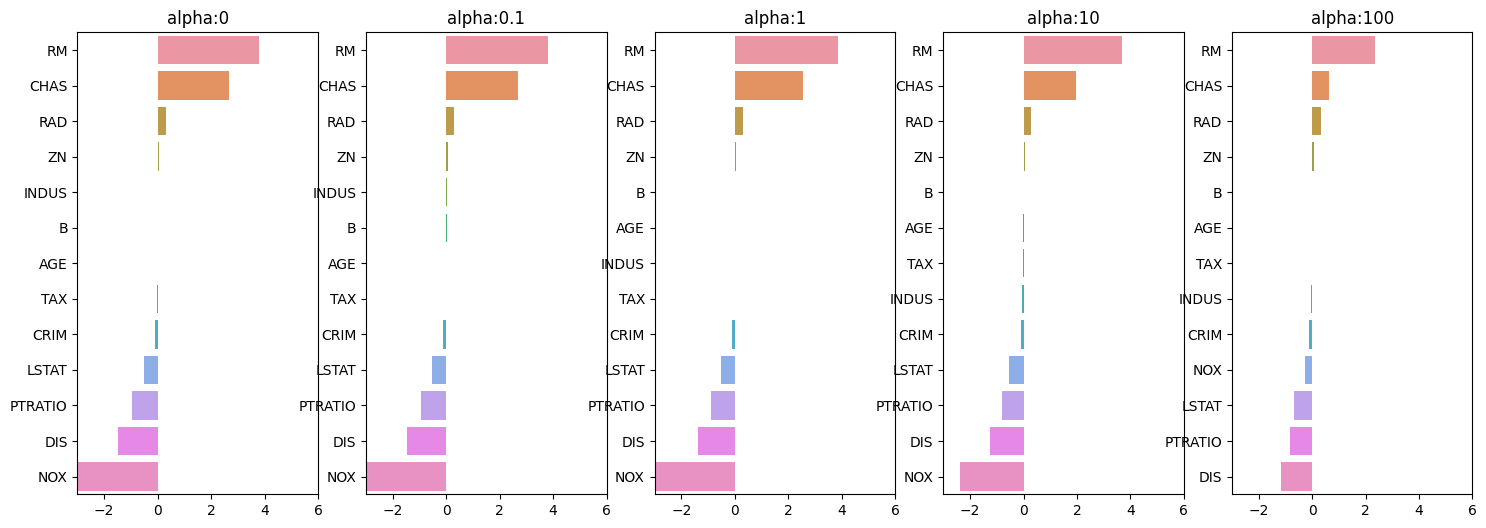

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회기 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)

  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있다
- 릿지 회귀의 경우 회귀 계수를 0으로 만들지 않음

## 라쏘 회귀
- 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- 적절한 피처만 회귀에 포함시키는 피처 선택의 특성
- Lasso 클래스 제공
- Lasso 클래스의 주요 생성 파라미터 alpha, L1규제 계수에 해당

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 엘라스틱넷 회귀
- L2규제와 L1규제를 결합한 회귀
- 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다.
- 이러한 성향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 이를 완화하기 위해 L2규제를 라쏘 회귀에 추가
- L1, L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다.
- 주요 생성 파라미터는 alpha와 l1_ratio
- 엘라스틱넷의 alpha는 릿지와 라쏘 클래스의 alpha와 다르다.
- 엘라스틱넷의 규제는 a*L1 + b*L2로 정의 되는데, alpha값은 a+b이다.
- 따라서 l1_ratio 파라미터 값은 a/(a+b)
- l1_ratio가 0이면 a가 0이므로 L2규제와 동일
- l1_ratio가 1이면 b가 0이므로 L1규제와 동일

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환
- 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 최적의 선형함수를 찾아내 결괏값을 예측
- 선형회귀모델은 피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호
- 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다.
- 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다.
- 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적  

------
1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이ㅛㅇ해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법. 1번 방법을 통해 예측 성능에 향싱이 없을 경우 이와 같은 방법 진행
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다.(로그 변환), 로그변환은 매우 유용한 변환이며 실제로 선형회귀에서는 1,2번 방법보다 로그 변환이 훨씬 많이 사용된다. 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생하기 때문

---
- 타깃값의 경우 일반적으로 로그 변환 적용
- 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있다.
- 왜곡된 분포도 형태의 타깃값을 로그 변환하여 예측 성능 향상이 된 경우가 많은 사례에서 검증되었기 때문에 타깃값의 경우는 로그 변환을 적용

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

# 07. 로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치(weight) 변수가 선형인지 아닌지를 따른다.
- 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정
- 많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수와 같이 S자 커브 형태를 가진다.
- 시그모이드 함수는 x값이 +,-로 아무리 커지거나 작아져도 y값은 항상 0과 1사이의 값을 반환한다.
- x값이 커지면 1로, 작아지면 0으로 근사, x=0이면 0.5
- 로지스틱 회귀는 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀
- LogisticRegression 클래스 제공
- LogisticRegression 클래스의 회귀 계수 최적화는 경사 하강법 외에 다양한 최적화 방안을 선택할 수 있음
- 'solver'파라미터에 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga' 값을 적용해 최적화 선택
  - 'lbfgs' : solver의 기본값, 메모리 공간 절약, CPU 코어 수가 ㅁ낳다면 최적화를 병렬로 수행 가능
  - 'liblinear' : 다차원이고 작은 데이터 세트에서 효과적으로 동작하지만 국소 최적화에 이슈가 있고 병렬로 최적화 할 수 없음
  - 'newton-cg' : 좀 더 정교한 최적화를 가능하게 하지만, 대용량 데이터에서 속도가 많이 느려짐
  - 'sag' : Stochastic Average Gradient로서 경사 하강법 기반의 최적화 적용, 대용량 데이터에서 빠르게 최적화
  - 'saga' : sag와 유사한 최적화 방식이며 L1 정규화 가능


In [ ]:
# LogisticRegression 클래스를 이용하여 위스콘신 유바암 데이터 세트 기반 암 여부 판단
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
# 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받ㅇㄹ 수 있으므로 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 데이터 세트 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc: 0.972


In [ ]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers :
  lr_clf = LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds = lr_clf.predict(X_test)

  # accuracy와 roc_auc 측정
  print('solver: {0}, accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver: lbfgs, accuracy: 0.977, roc_auc: 0.972
solver: liblinear, accuracy: 0.982, roc_auc: 0.979
solver: newton-cg, accuracy: 0.977, roc_auc: 0.972
solver: sag, accuracy: 0.982, roc_auc: 0.979
solver: saga, accuracy: 0.982, roc_auc: 0.979


- LogisticRegression 주요 파라미터
- penalty(규제) : l2(L2), l1(L1), default=l2
  - Liblinear, saga의 경우 L1, L2 모두 가능
  - lbfgs, newton-cg, sag의 경우 L2규제만 가능
- C(강도) : alpha값의 역수, C값이 작을수록 규제 강도가 크다

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'solver':['liblinear','lbfgs'],
    'penalty':['l2','l1'],
    'C':[0.01, 0.1, 1, 1, 5, 10]
}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.965


- 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어남
- 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분류에서도 자주 사용

# 08. 회귀 트리
- 트리 기반의 회귀는 회귀 트리를 이용하는 것이다.
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것
- 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM등의 모든 트리 기반 알고리즘은 분류 뿐만 아니라 회귀도 가능

In [ ]:
# 랜덤 포레스트 회귀 트리 RandomForestRegressor 이용해 보스턴 주택 가격 예측
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5교차 검증의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 평균 RMSE : 4.423


In [ ]:
# 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#### ', model.__class__.__name__,' ####')
  print('5교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회기 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
  get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
5교차 검증의 평균 RMSE : 5.978
####  RandomForestRegressor  ####
5교차 검증의 평균 RMSE : 4.423
####  GradientBoostingRegressor  ####
5교차 검증의 평균 RMSE : 4.269
####  XGBRegressor  ####
5교차 검증의 평균 RMSE : 4.251
####  LGBMRegressor  ####
5교차 검증의 평균 RMSE : 4.646


- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다.
- 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.

<Axes: >

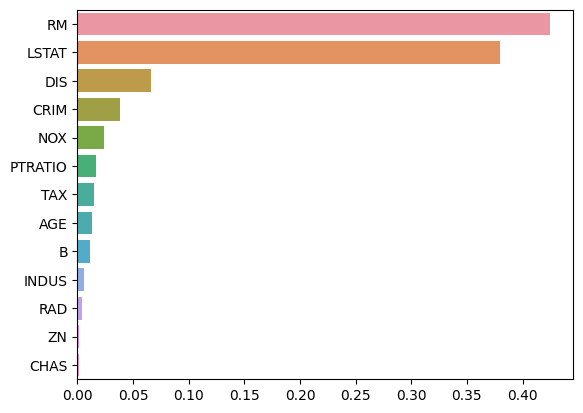

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_ , index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


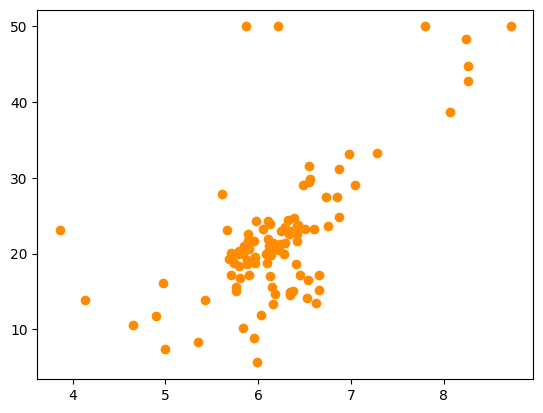

In [ ]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성, DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


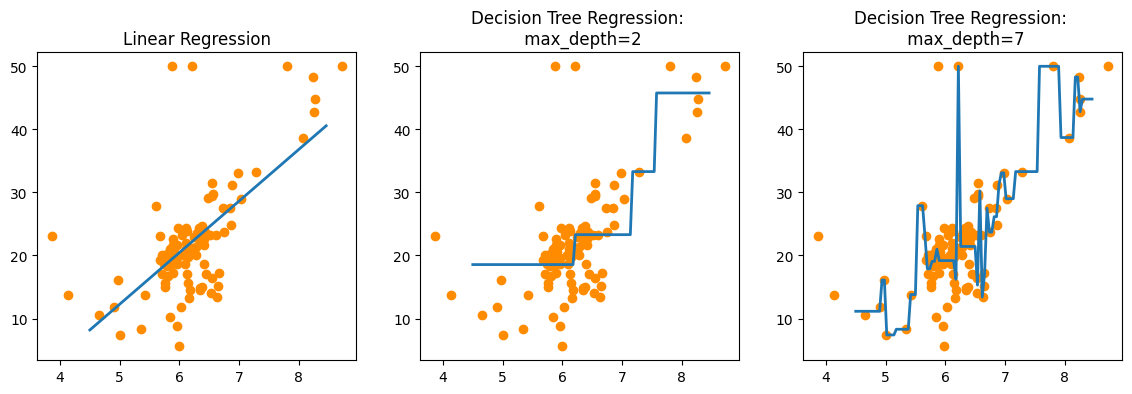

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4),ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력햇을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)


# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)


# 09. 회귀 실습 - 자전거 대여 수요 예측
## 데이터 클렌징 및 가공과 데이터 시각화

In [ ]:
from dask.bag.core import inline_singleton_lists
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlinefrom dask.bag.core import inline_singleton_lists
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
from google.colab import drive
drive.mount('/content/drive')

bike_df = pd.read_csv('/content/drive/MyDrive/DATA/bike_train.csv')
print(bike_df.shape)
bike_df.head()
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
from google.colab import drive
drive.mount('/content/drive')

bike_df = pd.read_csv('/content/drive/MyDrive/DATA/bike_train.csv')
print(bike_df.shape)
bike_df.head()

Mounted at /content/drive
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일 , 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

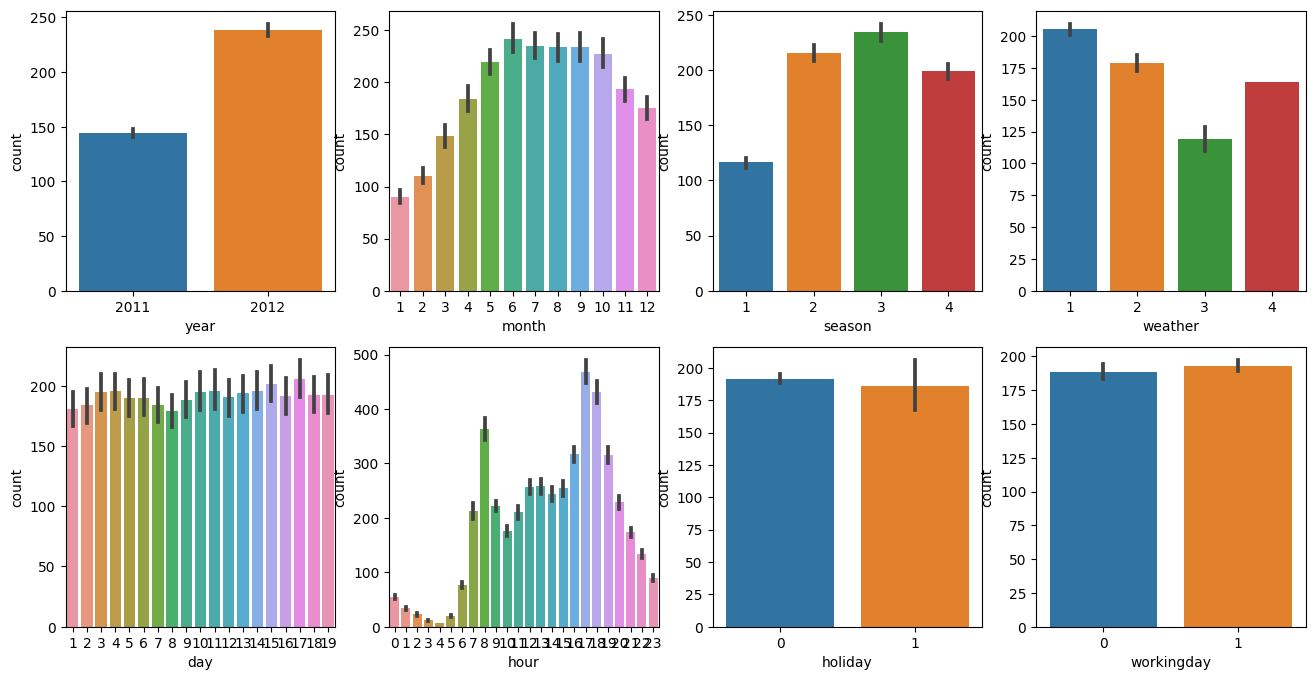

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year','month','season','weather','day','hour','holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features) :
  row = int(i/4)
  col = i%4
  # 시본의 barplot을 이용해 칼럼값에 따른 count의 합 표현
  sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [ ]:
# 캐글에서 요구한 성능 평가 방법 RMSLE(Root Mean Square Log Error : 오류 값의 로그에 대한 RMSE)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
# log1p() = 1+log()
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
# 다음과 같은 rmsle 구현은 오버플로나 언더플로 오류를 발생하기 쉽다
#def rmsle(y, pred):
#  msle = mean_squared_log_error(y, pred)
#  rmsle = np.sqrt(msle)
#  return rmsle

## 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5) :
  # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
  result_df = pd.DataFrame(y_test.values, columns=['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])

  # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


- 가장 큰 상위 5위 오류 값은 546~568로 실제 값을 감안하면 예측 오류가 크다
- 회귀에서 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인하는 것
- Target 값의 분포는 정규 분포 형태가 가장 좋다
- 왜곡된 경우에는 회귀 예측 성능이 저하되는 경우 발생하기 쉽다

<Axes: >

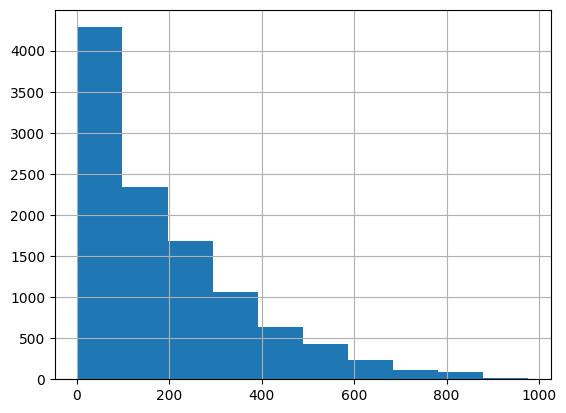

In [ ]:
y_target.hist()

- 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것

<Axes: >

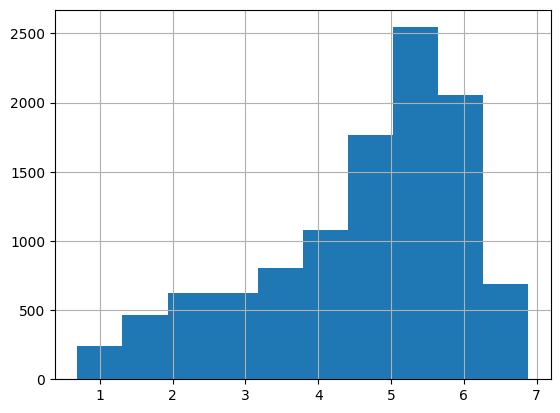

In [ ]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: >

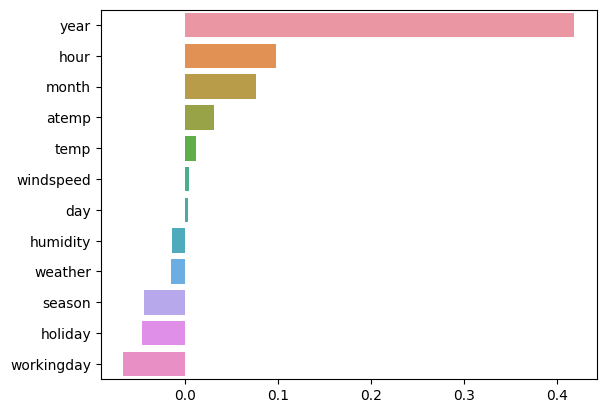

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
# 'year', 'month', 'day', 'hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday','season','weather'])

In [ ]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

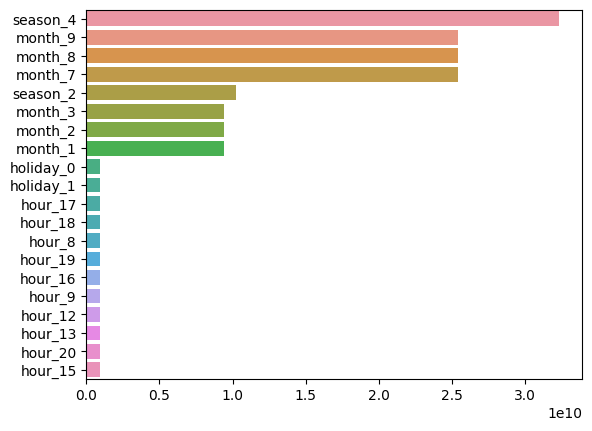

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightBGM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg] :
  # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.390, MAE: 31.231
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.328, MAE: 32.735
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


# 10. 회귀 실습 - 캐글 주택 가격 : 고급 회귀 기법
- 성능평가 : RMSLE 기반
## 데이터 사전 처리(Preprocessing)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
from google.colab import drive
drive.mount('/content/drive')

house_df_org = pd.read_csv('/content/drive/MyDrive/DATA/house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [2]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


- null 값이 너무 많음

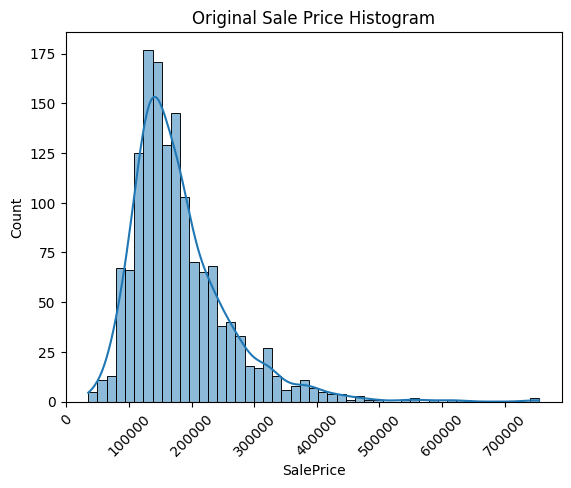

In [5]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

- 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태로 정규분포에서 벗어나 있음

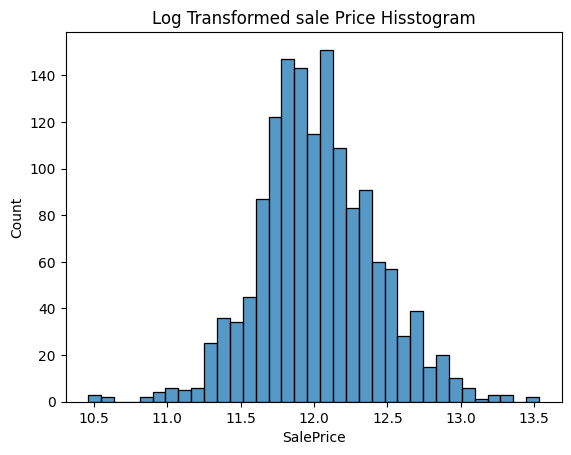

In [7]:
# 정규분포가 아닌 결과값을 정규 분포 형태로 변환하기 위해 로그 변환 적용
plt.title('Log Transformed sale Price Hisstogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice)
plt.show()

In [9]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type : \n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


<ipython-input-9-8ab44e3ab3f4>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_df.fillna(house_df.mean(), inplace=True)


- 숫자형 피처 null값 대체
- 문자형 피처 원-핫 인코딩으로 변환
- get_dummies( )를 이용해 원-핫 인코딩 진행
- 자동으로 문자열 피처를 원-핫 인코딩 변환하면서 Null 값은 모든 인코딩 값이 0으로 변환되는 방식으로 대체해주므로 별도의 Null 값을 대체하는 로직이 필요 없음

In [11]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


## 선형 회귀 모델 학습/예측/평가
- SalePrice값 -> 로그 변환
- 예측값 역시 로그 변환된 SalePrice 값을 기반으로 예측하므로 원본 SalePrice 예측값의 로그 변환 값

In [12]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.01
Lasso 로그 변환된 RMSE: 0.018


[0.01048533599115431, 0.009983106118117256, 0.01795924469011488]

- 라쏘 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나옴
- 라쏘의 경우 최적 하이퍼 파라미터 튜닝 필요해 보임


In [14]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

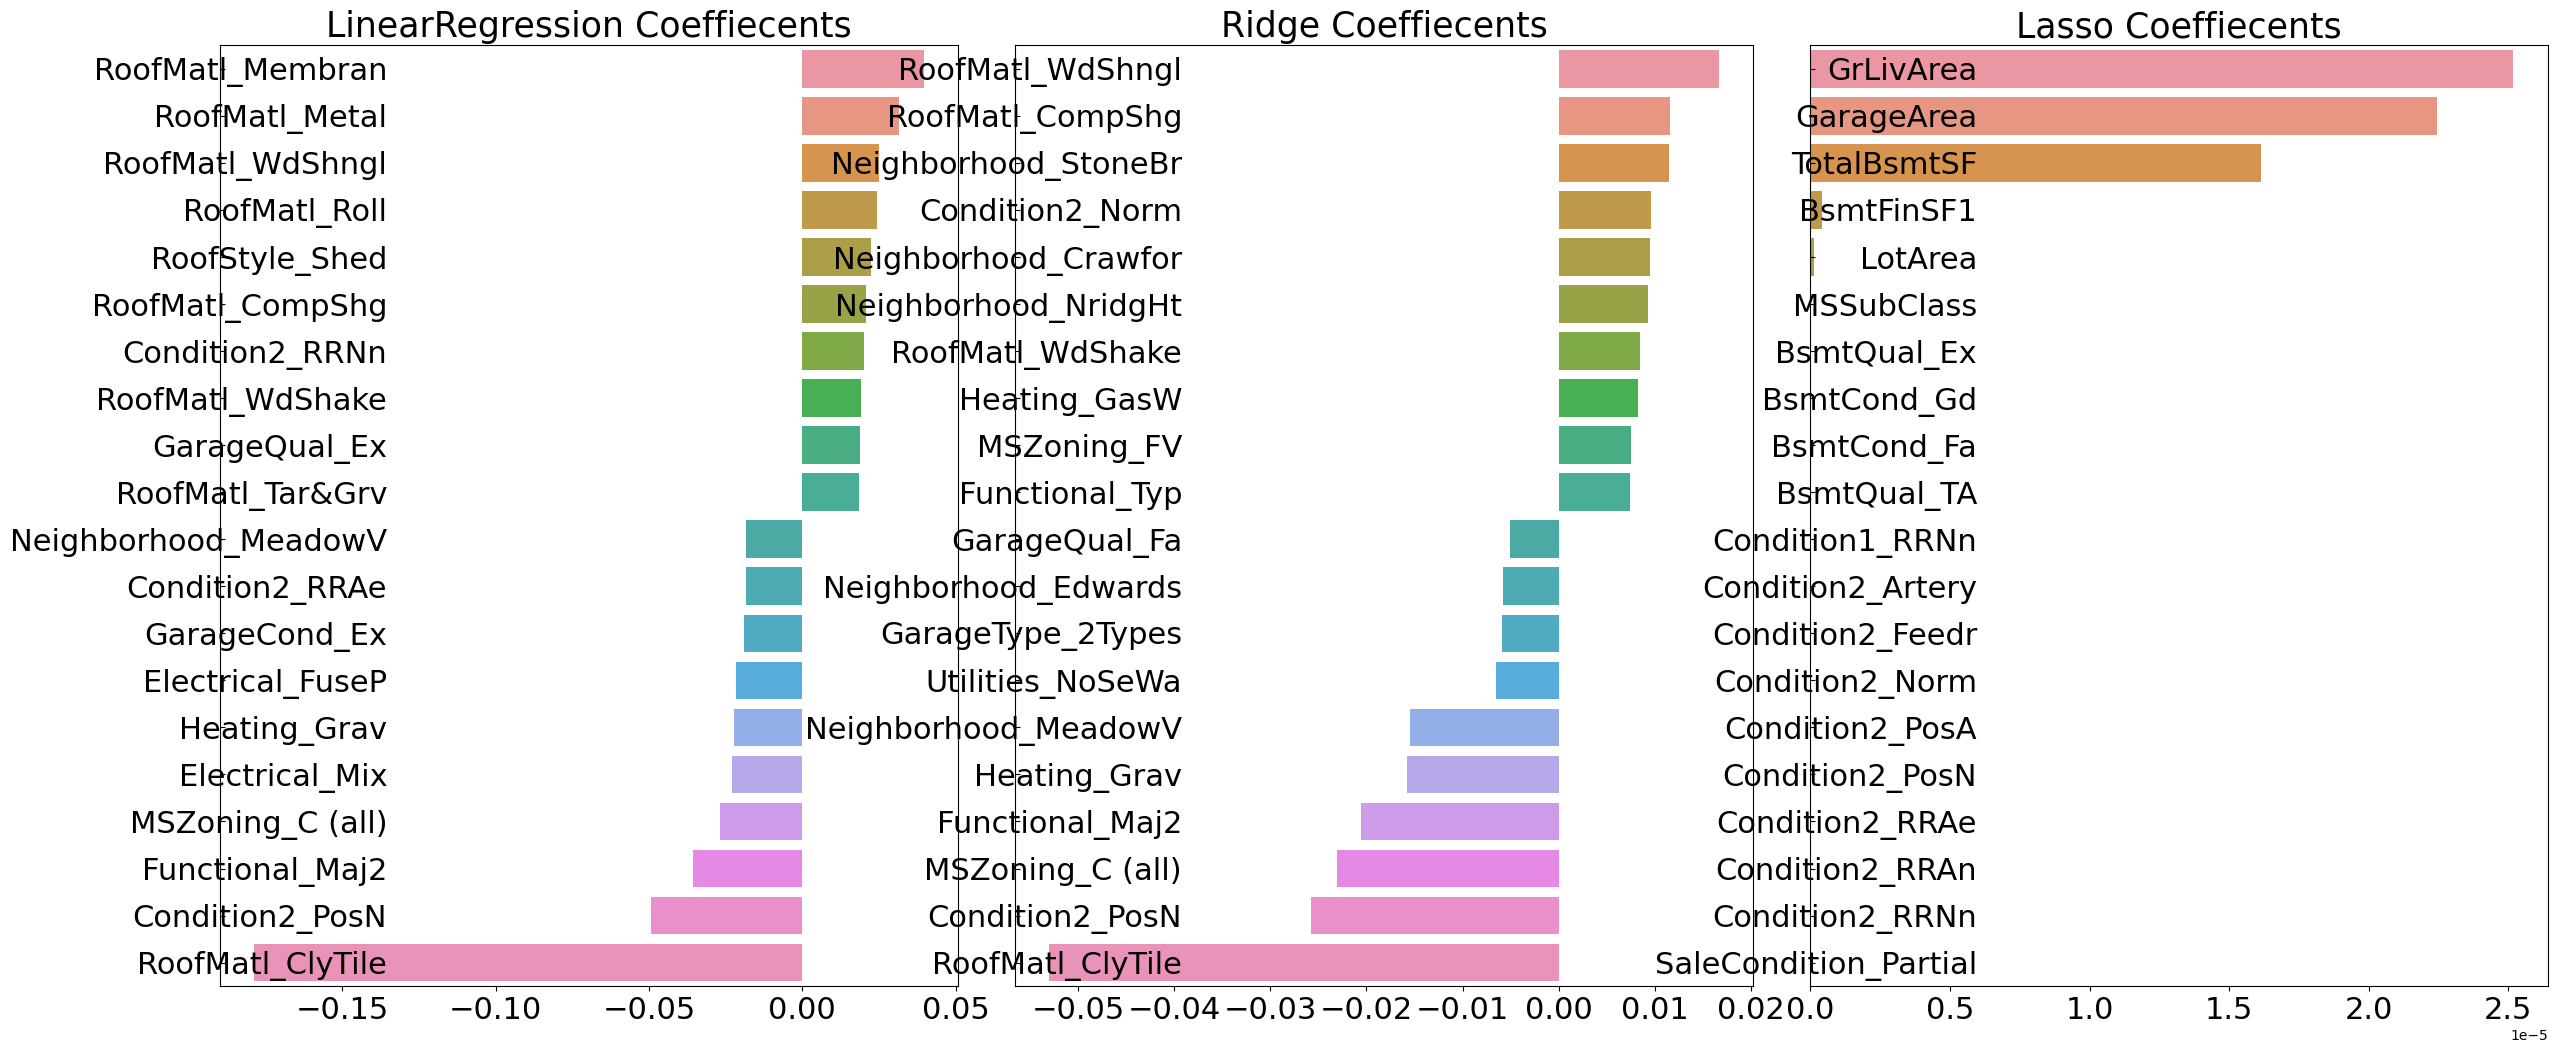

In [15]:
# 모델별 회귀 계수를 시각화

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- OLS 기반의 LinearRegression과 Ridge의 경우는 회귀 계수가 유사한 형태로 분포됨
- 라쏘는 전체적으로 회귀 계수값이 매우 작고, 그 중에 YearBuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작음
- 라쏘의 경우 다른 두 개의 모델과 다른 회귀 계수 형태를 보이고 있음
- 학습 데이터의 데이터 분할에 문제가 있어서 그런 것인지 확인

In [16]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.011 0.013 0.013 0.009 0.015]
LinearRegression CV 평균 RMSE 값: 0.012

Ridge CV RMSE 값 리스트: [0.009 0.012 0.011 0.009 0.014]
Ridge CV 평균 RMSE 값: 0.011

Lasso CV RMSE 값 리스트: [0.016 0.019 0.018 0.017 0.022]
Lasso CV 평균 RMSE 값: 0.019


- 여전히 라쏘의 경우 릿지 모델보다 성능이 떨어짐
- 하이퍼 파라미터 튜닝

In [17]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.011, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0126, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.01
Lasso 로그 변환된 RMSE: 0.011


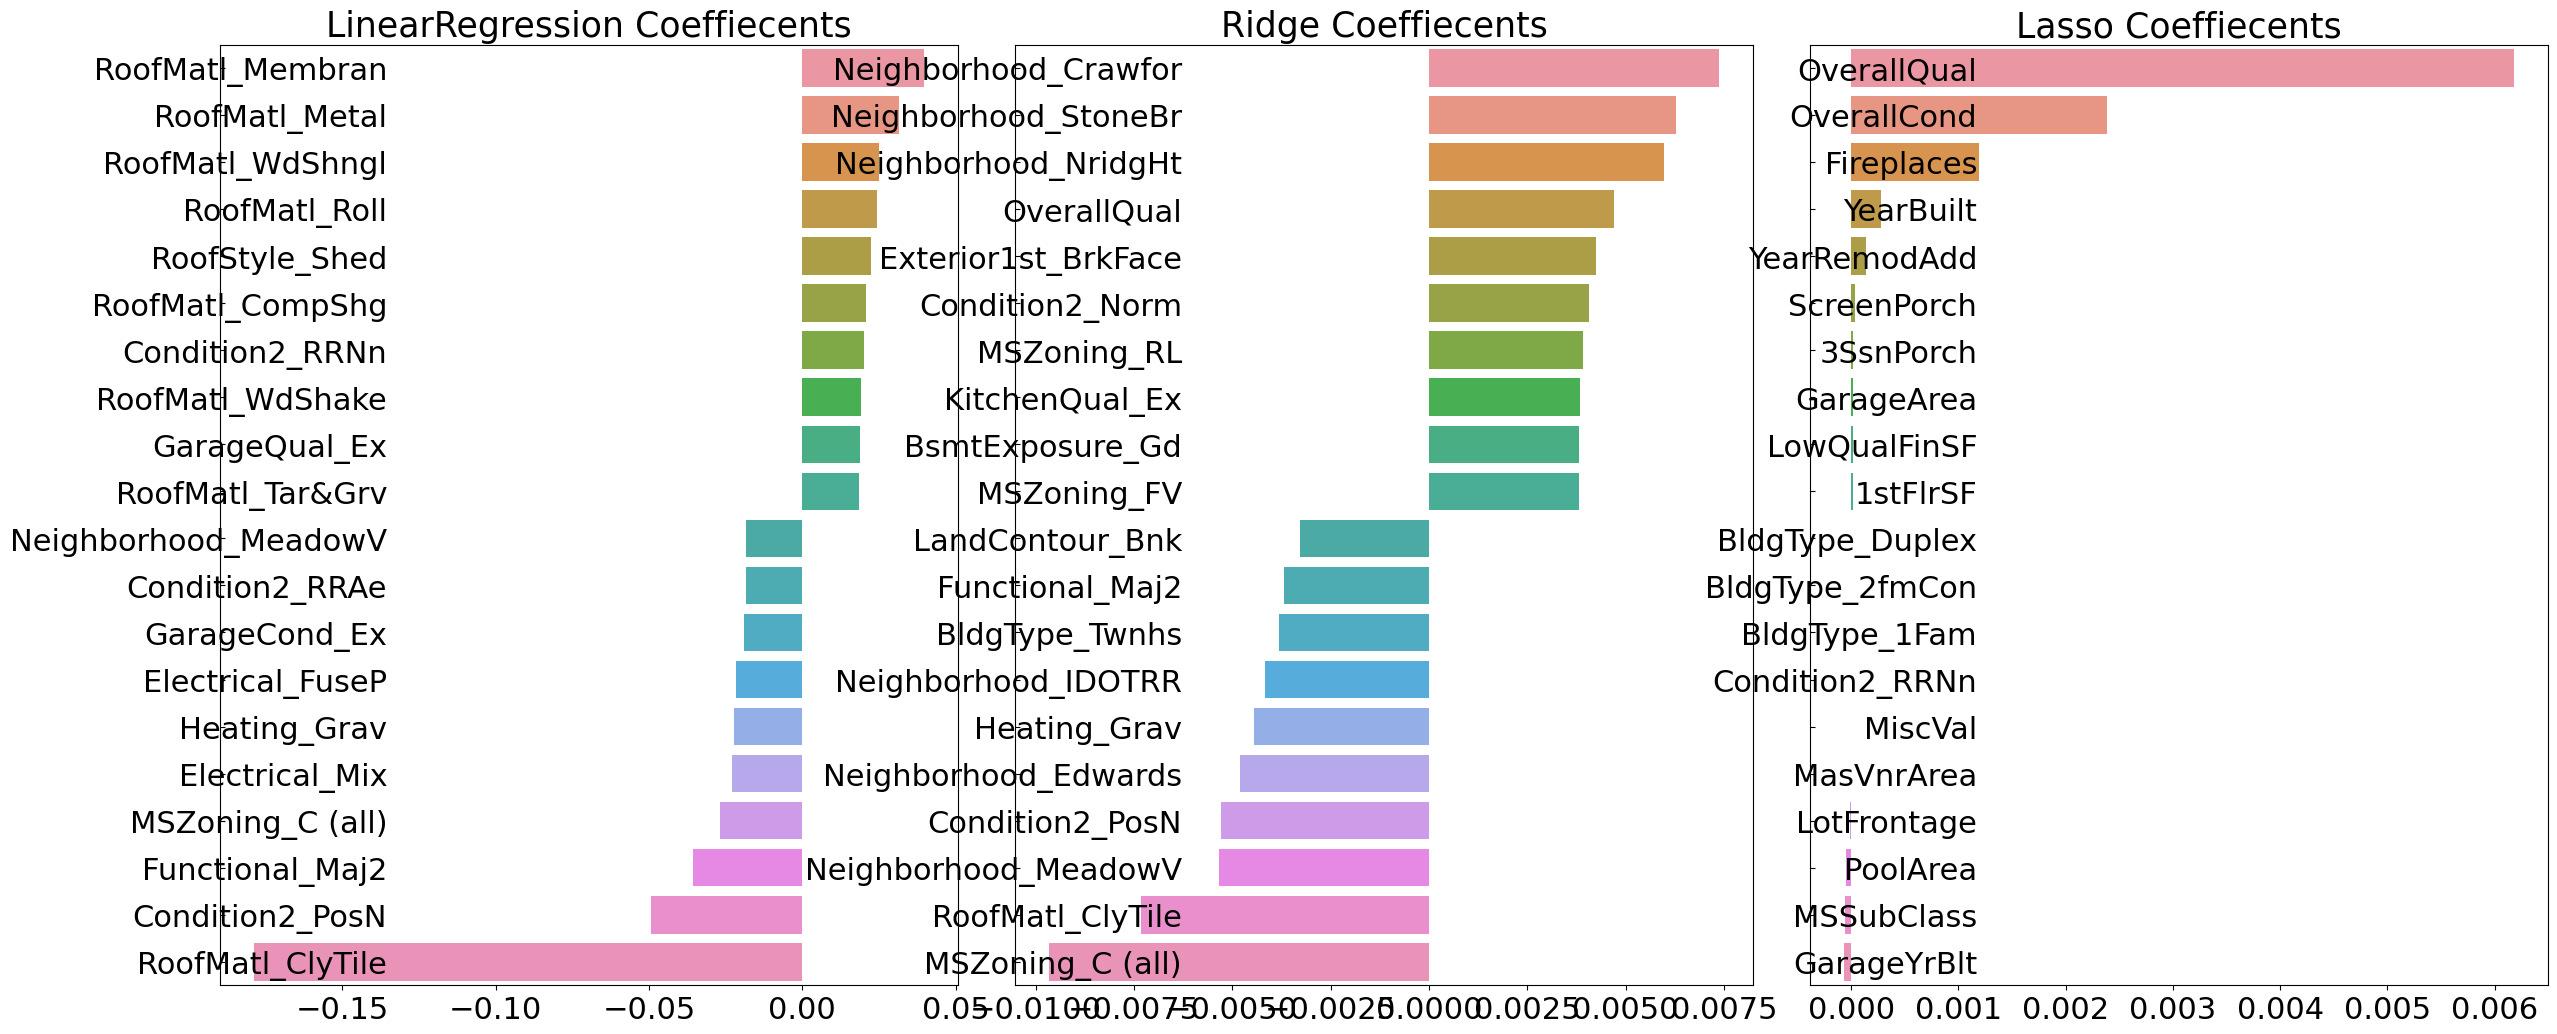

In [18]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- alpha 값 최적화 후 테스트 데이터 세트의 예측 성능 더 좋아짐
- 피처 데이터 세트의 데이터 분포도와 이상치 데이터 처리를 진행해 모델 튜닝 진행
- 데이터 왜곡 로그 변환 후 성능 평가

In [19]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [20]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [21]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0099, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0121, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.009
Lasso 로그 변환된 RMSE: 0.012


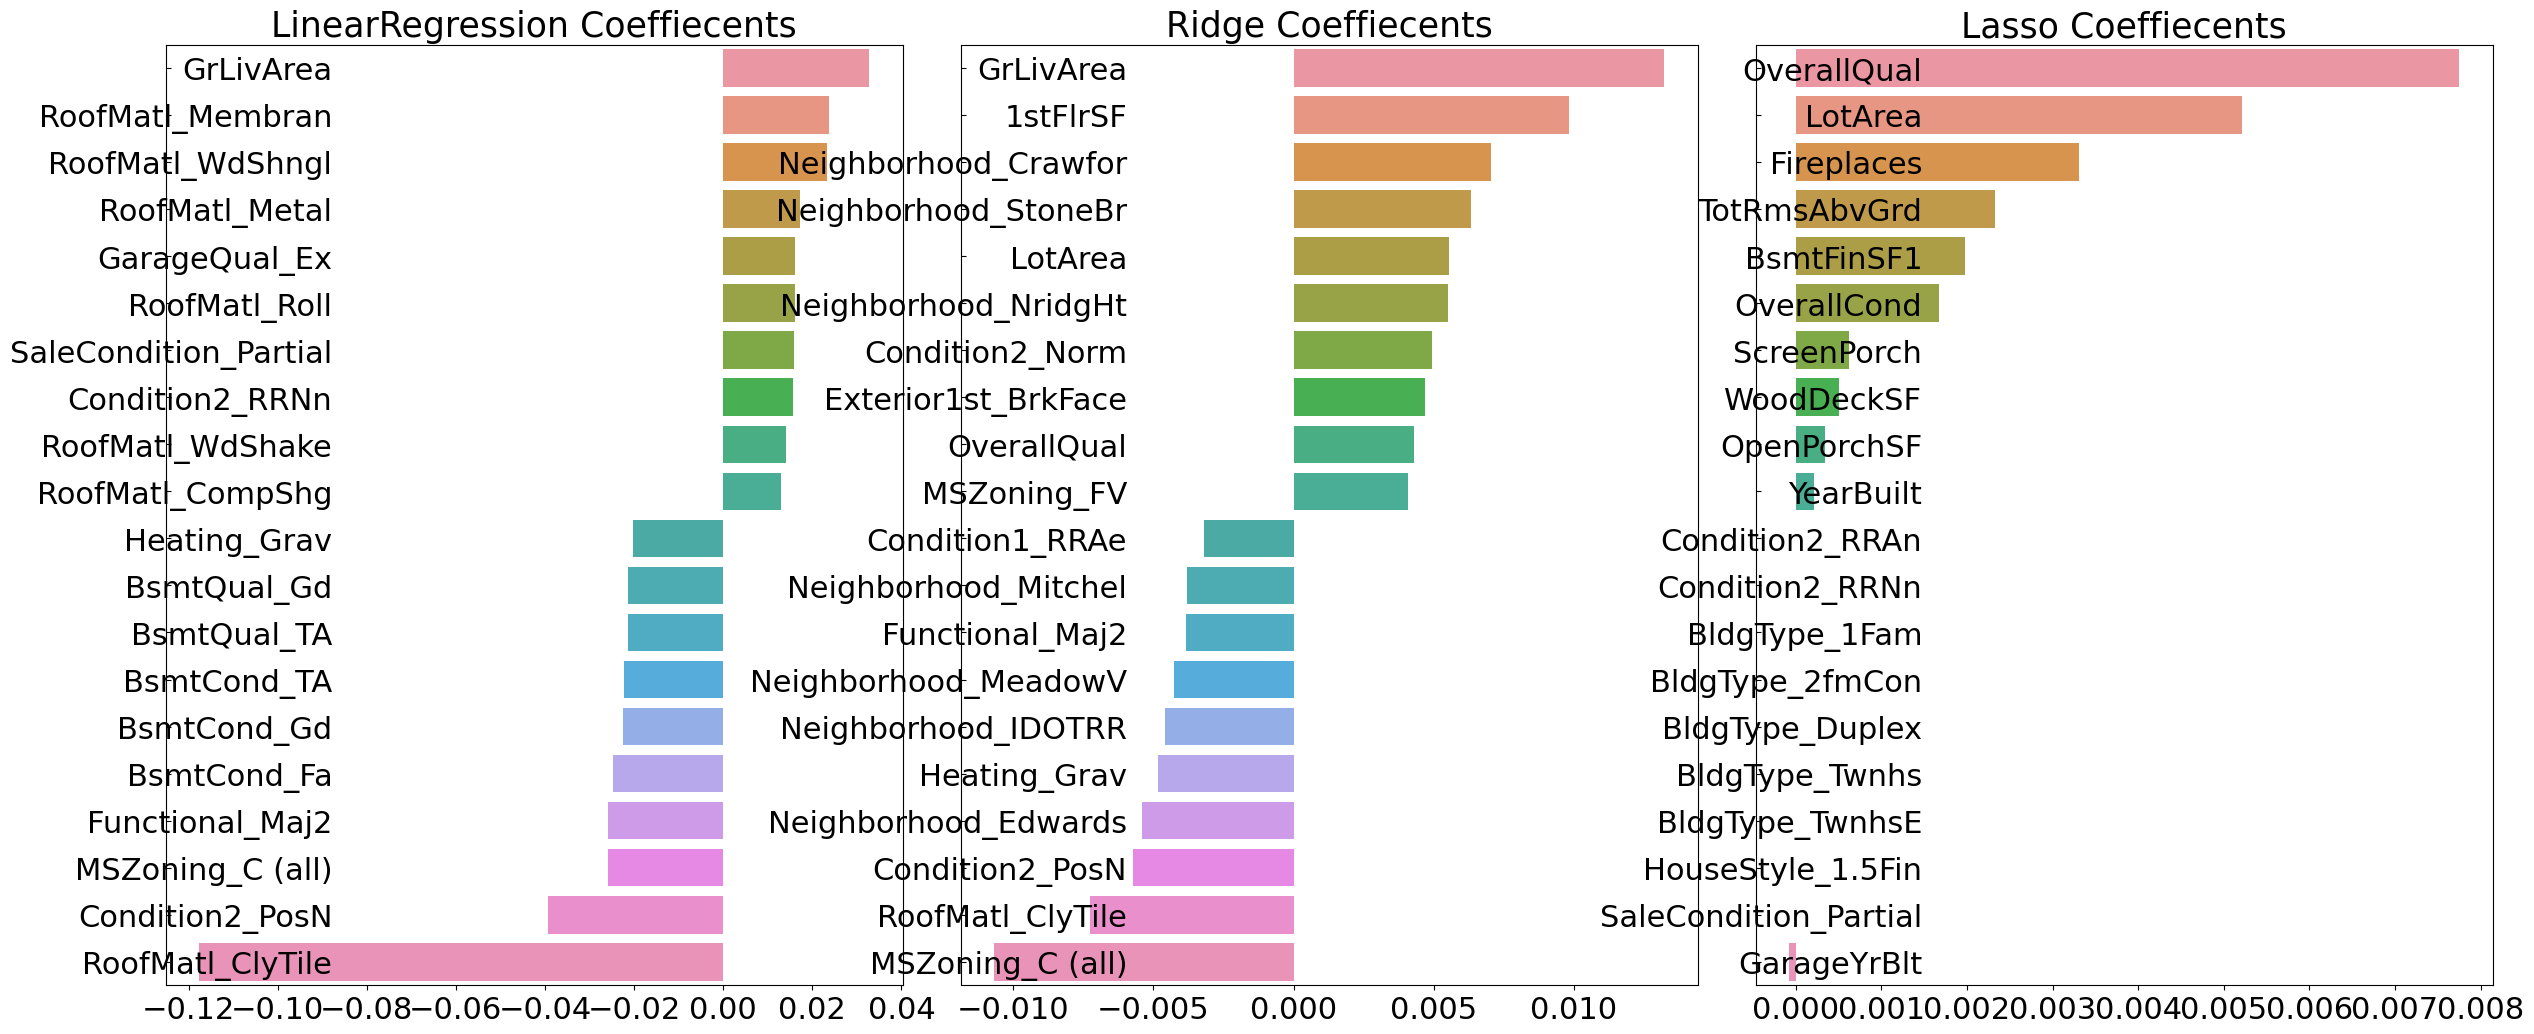

In [22]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 이상치 데이터 제거

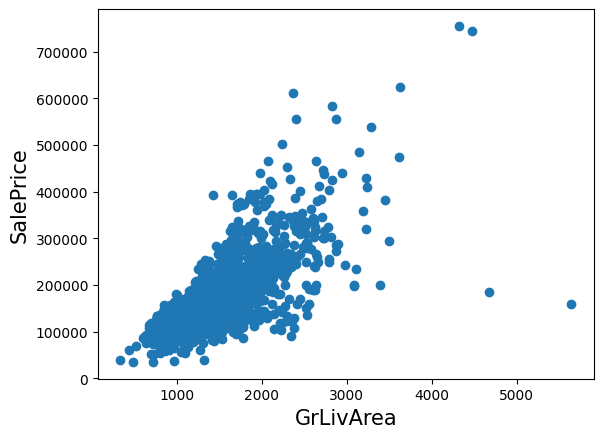

In [23]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [24]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523  691 1182 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1456, 271)


In [25]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0088, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0114, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.009
Lasso 로그 변환된 RMSE: 0.012


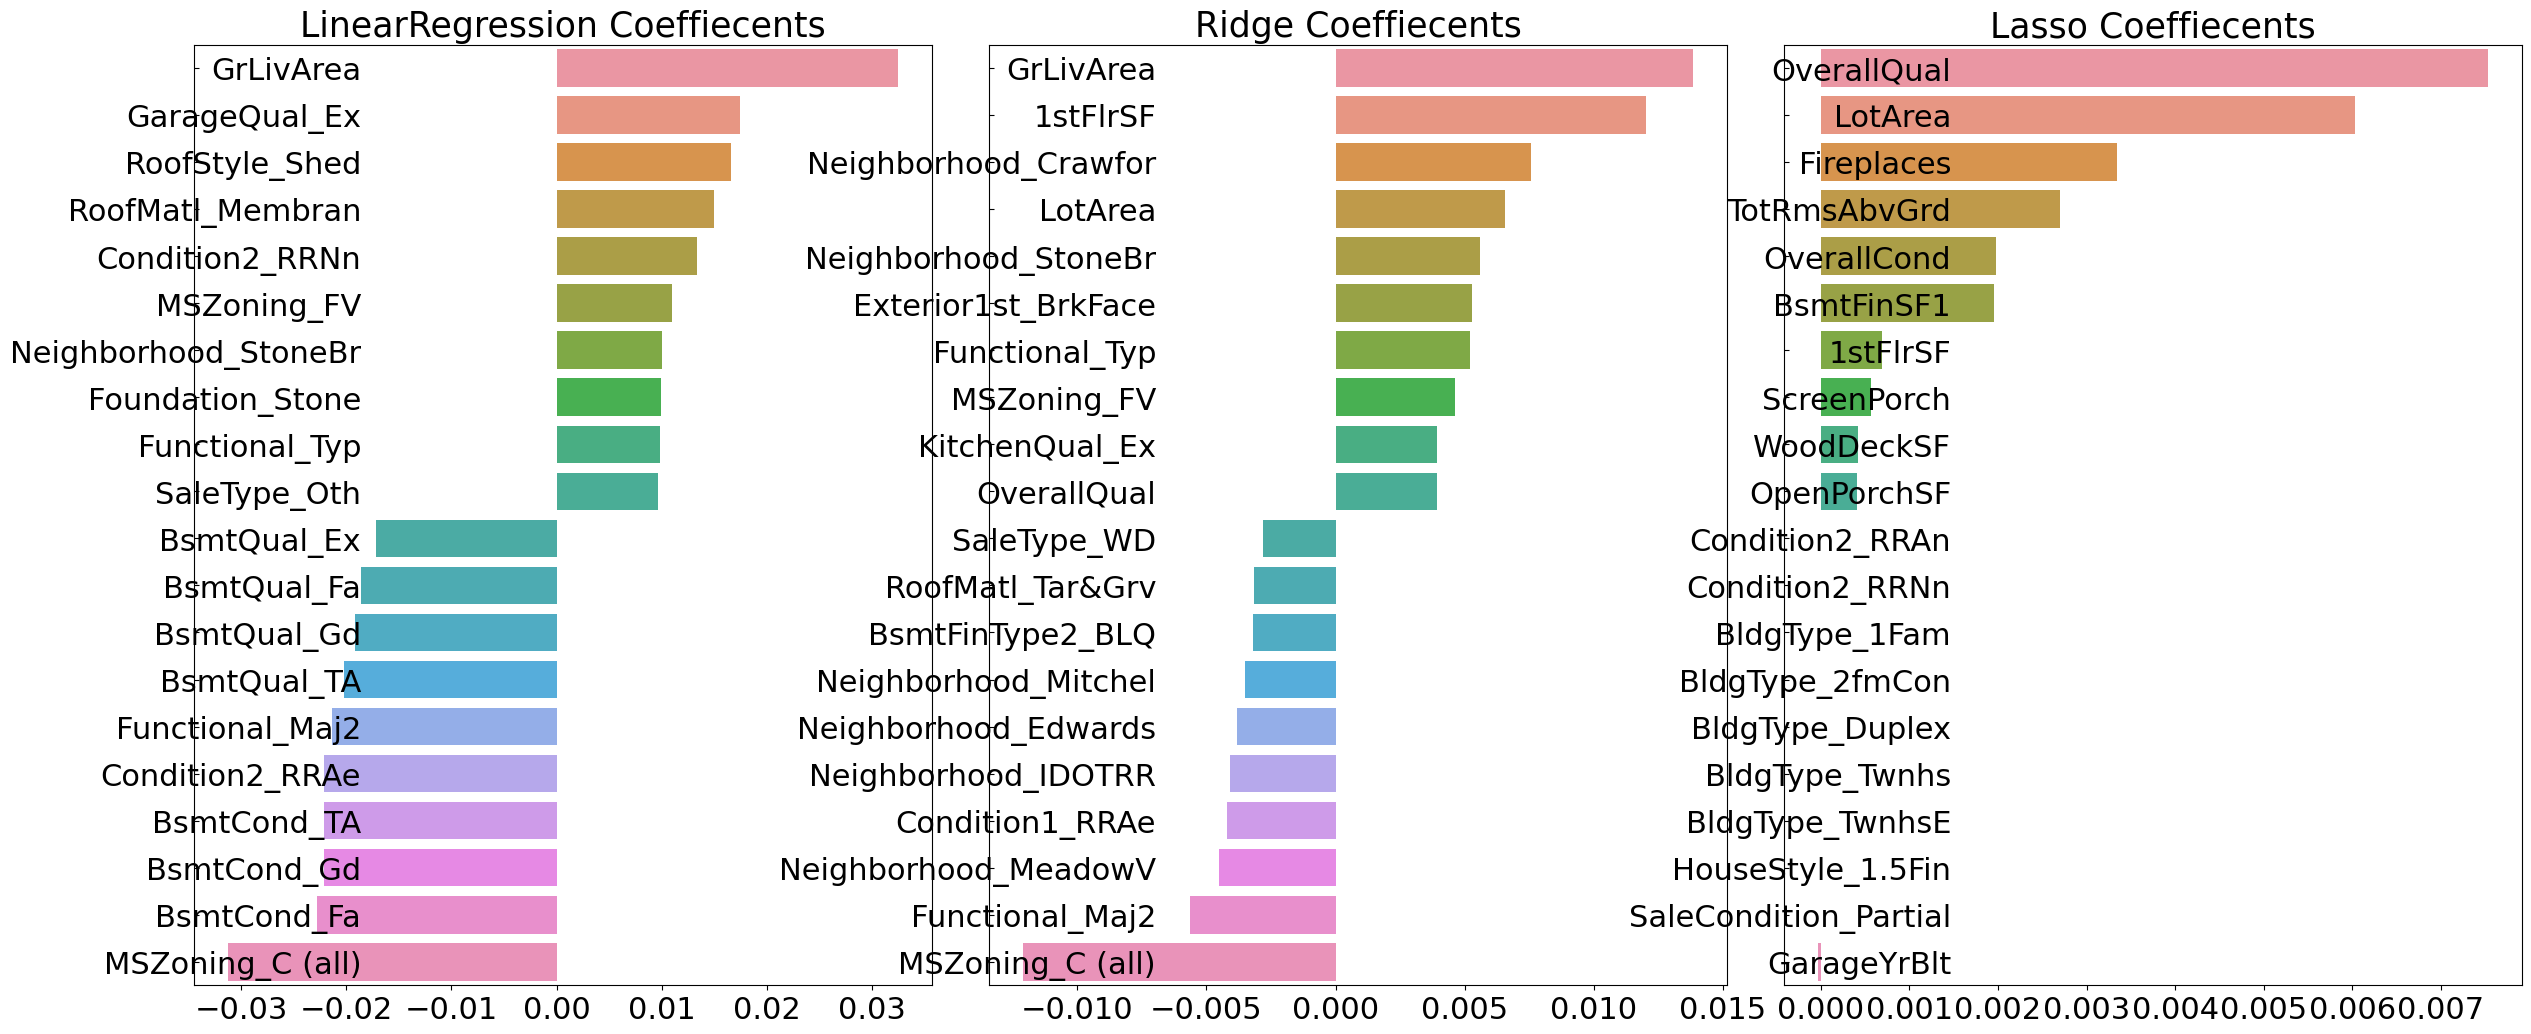

In [26]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 회귀 트리 모델 학습/예측/평가

In [27]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.0092, 최적 alpha:{'n_estimators': 1000}


In [28]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.0091, 최적 alpha:{'n_estimators': 1000}


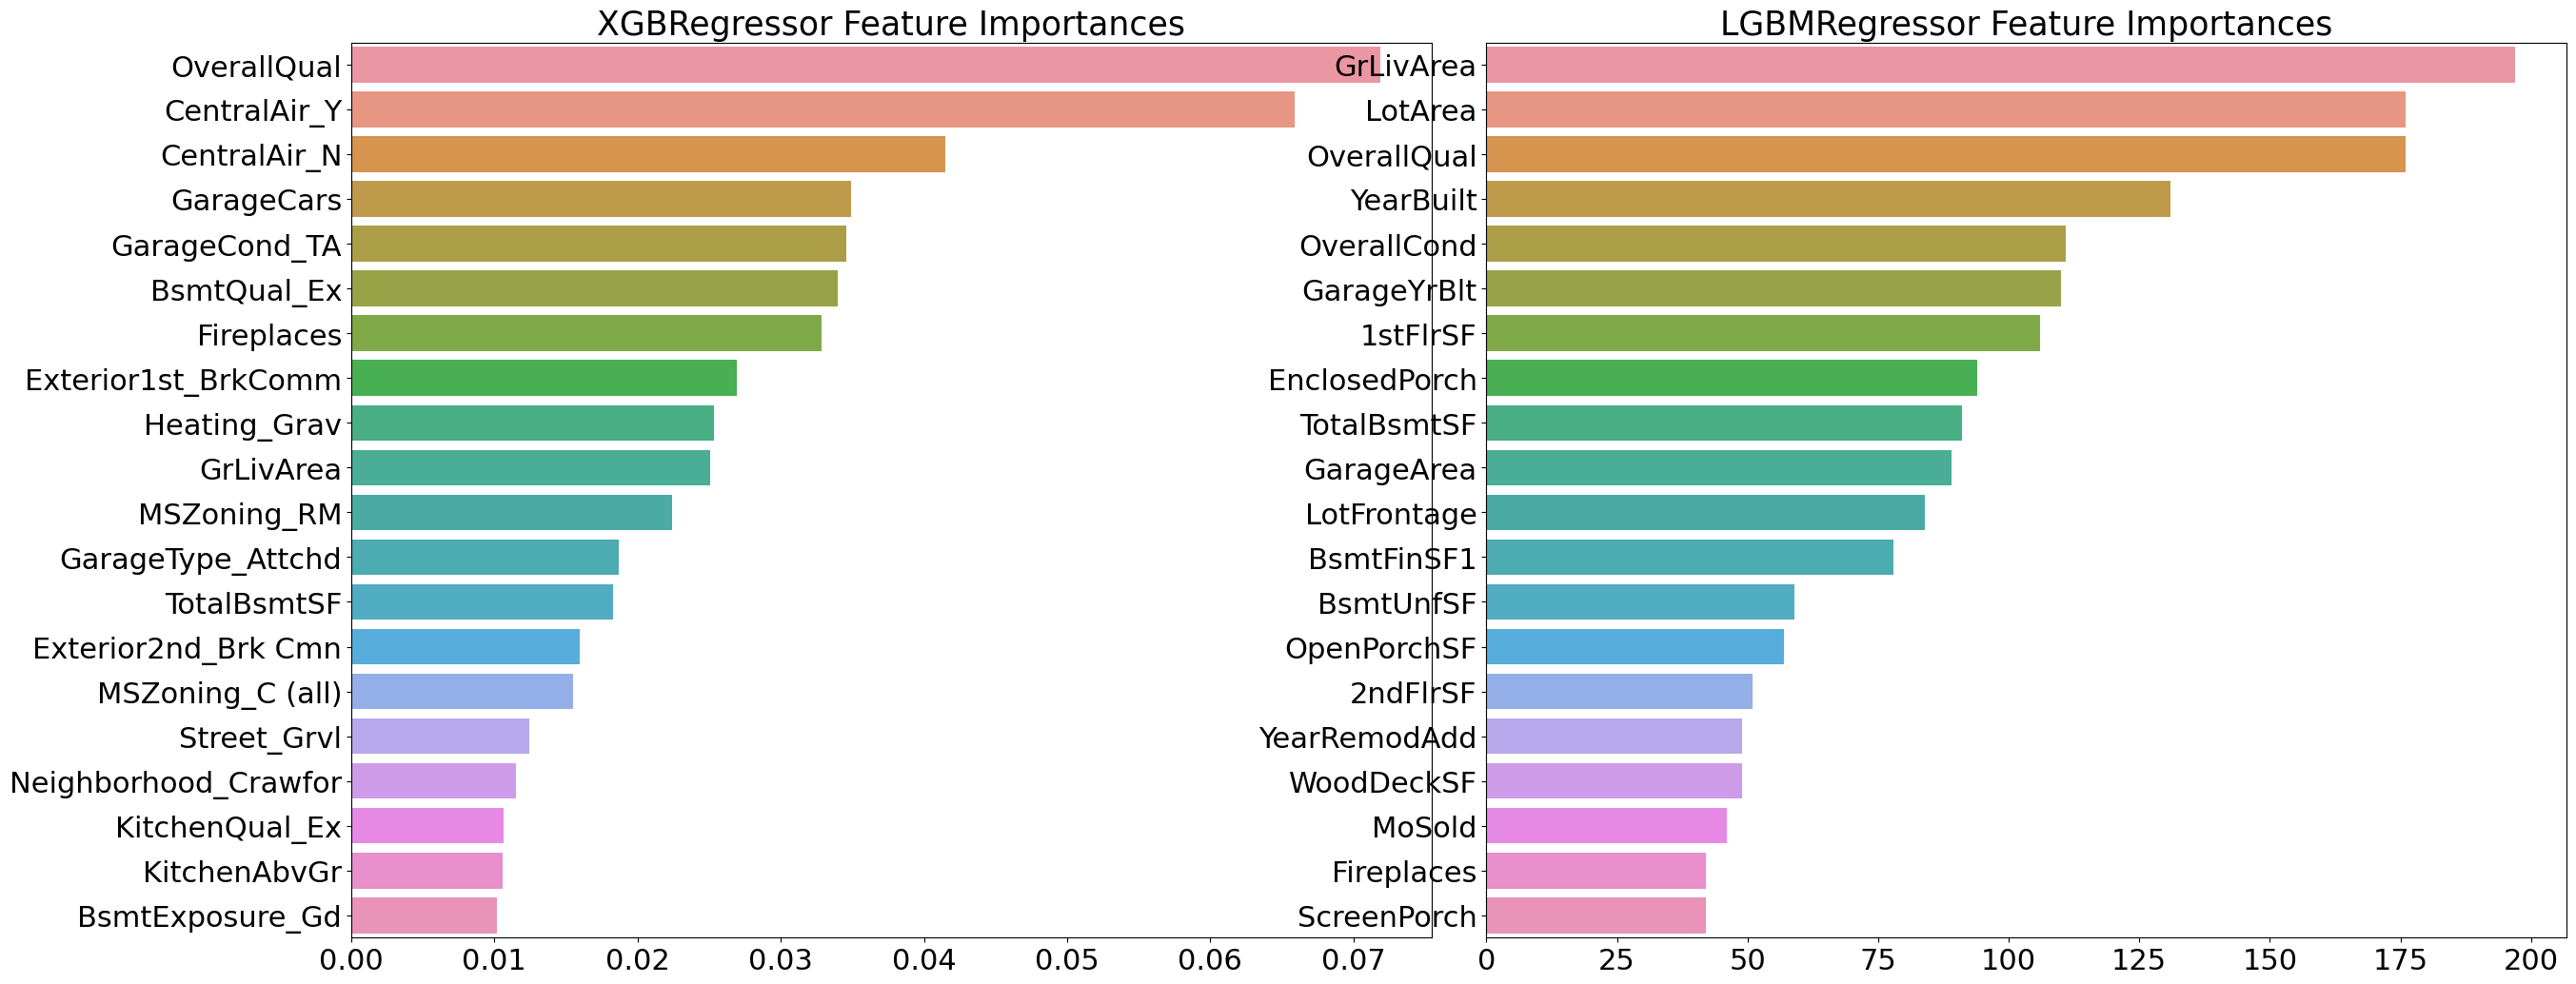

In [29]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

## 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [30]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.01036259553832403
Ridge 모델의 RMSE: 0.00932234939269758
Lasso 모델의 RMSE: 0.011916261294565115


In [31]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.009392216906670794
XGBM 모델의 RMSE: 0.009912948922854752
LGBM 모델의 RMSE: 0.009314627356088002


## 스태킹 앙상블 모델을 통한 회귀 예측
- 개별적인 기반 모델
- 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
- 스태킹 모델 : 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [33]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [34]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.021421766813220933


# 11. 정리
- 선형 회귀 : 실제값과 예측값의 차이인 오류를 최소로 줄일 수 있는 선형 함수를 찾아서 이 선형 함수에 독립변수(피처)를 입력해 종속변수(타깃값, 예측값)를 예측하는 것
- 최적의 선형 함수를 찾기 위해 실제값과 예측값 차이의 제곱을 회귀 계수 W를 변수로 하는 비용 함수로 만들고, 이 비용 함수가 최소화되는 W의 값을 찾아 선형 함수를 도출 할 수 있었다.
- 실제값과 예측값의 차이를 최소화하는 것에만 초점을 맞춘 단순 선형 회귀는 학습 데이터에 과적합되는 문제를 수반할 가능성이 높음
- 이를 해결하기 위해 규제를 도입
- L2규제를 적용한 릿지, L1규제를 적용한 라쏘, L1에 L2 규제를 결합한 엘라스틱넷
- 선형 회귀를 분류에 적용한 대표적인 모델이 바로 로지스틱 회귀
- 분류를 위한 알고리즘
- 이진 분류나 희소 행렬로 표현되는 텍스트 기반의 분류에서 높은 예측 성능을 나타냄
- 선형(또는 비선형) 회귀와 같이 최적의 선형(또는 비선형) 함수를 찾아내는 대신 회귀 트리를 이용해 예측하는 방법도 있음
- 분류 트리와 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있다.
- 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 알고리즘
- 선형 모델을 기반으로 하는 선형 회귀는 데이터 값의 분포도와 인코딩 방법에 많은 영향을 받을 수 있음
- 선형 회귀는 데이터 값의 분포도가 정규 분포와 같이 종 모양의 형태를 선호, 특히 타깃값의 분포도가 왜곡(Skew)되지 않고 정규 분포 형태로 되어야 예측 성능을 저하시키지 않음
- 데이터 세트가 왜곡된 데이터 분포도를 가지고 있을 때 일반적으로 로그 변환을 적용하는 것이 유용
- 선형 회귀의 경우 데이터에 카테고리형 데이터가 있을 경우 이를 레이블 인코딩을 통한 숫자형 변환보다는 원-핫 인코딩으로 변환해줘야 함
- 회귀 트리의 경우 인코딩 방식에 크게 영향 받지 않음
